<a href="https://colab.research.google.com/github/yexf308/AppliedStatistics/blob/main/Homework/HW2/565Fa22HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pylab inline 
import numpy as np
import pandas as pd
from scipy import linalg
from itertools import combinations
import scipy

Populating the interactive namespace from numpy and matplotlib


$\def\m#1{\mathbf{#1}}$
$\def\mm#1{\boldsymbol{#1}}$
$\def\mb#1{\mathbb{#1}}$
$\def\c#1{\mathcal{#1}}$
$\def\mr#1{\mathrm{#1}}$
$\newenvironment{rmat}{\left[\begin{array}{rrrrrrrrrrrrr}}{\end{array}\right]}$
$\newcommand\brm{\begin{rmat}}$
$\newcommand\erm{\end{rmat}}$
$\newenvironment{cmat}{\left[\begin{array}{ccccccccc}}{\end{array}\right]}$
$\newcommand\bcm{\begin{cmat}}$
$\newcommand\ecm{\end{cmat}}$
# Homework 2
## Homework guideline
- The deadline is Oct 5th 10:30am. Submission after the deadline will not be graded. 

- Submit your work(your reasoning and your code) as a SINGLE .ipynb document. Please rename the document as _HW1_YOURNAME.ipynb_ (for example, _HW1_FELIX.ipynb_). You are responsible for checking that you have correctly submitted the correct document. If your code cannot run, you may receive NO point. 

- Please justify all short answers with a brief explanation. If you use latex command in the markdown, **2 points** bonus will be awarded.   

- You only use the Python packages included in the following cell. You are not allowed to use other advanced package or modules unless you are permitted to. 

- In your final submission include the plots produced by the unedited code as presented below, as well as any additional plots produced after editing the code during the course of a problem. You may find it necessary to copy/paste relevant code into additional cells to accomplish this.

- Feel free to use the lecture notes and other resources. But you
must understand, write, and hand in your own answers. In addition, you must write and submit
your own code in the programming part of the assignment (we may run your code).
If you copy someone else homework solution, both of you may receive ZERO point. 


- Colab is preferred. However, if you use Anaconda, please download the .mat file locally and save it to the same folder as this homework file. 

**Collaboration:** List the names of all people you collaborated with and for which question(s). This is important!



---



---


# Q1: Biased or Unbiased？(10pt)
### Q1.1 (10pt)
Is the test error unbiased for the following program? If not, how can we fix the code so it is?

In [ ]:
# Given dataset of 1000-by-50 feature
# matrix X, and 1000-by-1 labels vector

X = np.random.rand(1000,50)
y = np.random.rand(1000)


mu = np.mean(X, axis=0)
X = X - mu

#split to train and test
idx = np.random.permutation(1000)
TRAIN = idx[0:900]
TEST = idx[900::]

ytrain = y[TRAIN]
Xtrain = X[TRAIN, :]

# solve for argmin_w ||Xtrain*w - ytrain||_2
w = np.linalg.solve(np.dot(Xtrain.T, Xtrain), np.dot(Xtrain.T, ytrain))
b = np.mean(ytrain)

ytest = y[TEST]
Xtest = X[TEST, :]

train_error = np.dot(np.dot(Xtrain, w)+b - ytrain,
                np.dot(Xtrain, w)+b - ytrain ) / len(TRAIN)
test_error = np.dot(np.dot(Xtest, w)+b - ytest,
                np.dot(Xtest, w)+b - ytest ) / len(TEST)
test_error2 = np.dot(np.dot(Xtest, w)+b + ytest,
                np.dot(Xtest, w)+b + ytest ) / len(TEST)

print('Train error = ', train_error)
print('Test error = ', test_error)
print('Test error = ', test_error2)
# hint: D = test set, T = train set, interset D and T must be empty

Train error =  0.07790346967869563
Test error =  0.08833696271682749
Test error =  0.09152971171718692




---



---


# Q2: Online estimate on Covariance (20pt)

In class, we introduce the online estimation on the mean and variance. Very similar algorithms can be used to compute the **covariance** with only one pass.
Note the definition of covariance for two univariate random variables $X$ and $Y$ is 
\begin{align}
\text{cov}_N(X, Y) = \frac{\sum_{i=1}^N (x_i-\bar{x}_N)(y_i-\bar{x}_N)}{N}
\end{align}
where $\bar{x}_N$ and $\bar{y}_N$ are the empirical mean. 



---


### Q2.1: Proof (10pt)

Show the following identity
\begin{align}
\boxed{N\cdot \text{cov}_N(X, Y) = (N-1)\cdot\text{cov}_{N-1}(X, Y)+ \frac{N-1}{N}(x_N-\bar{x}_{N-1})(y_N-\bar{y}_{N-1})}
\end{align}
 

# Your Solution:
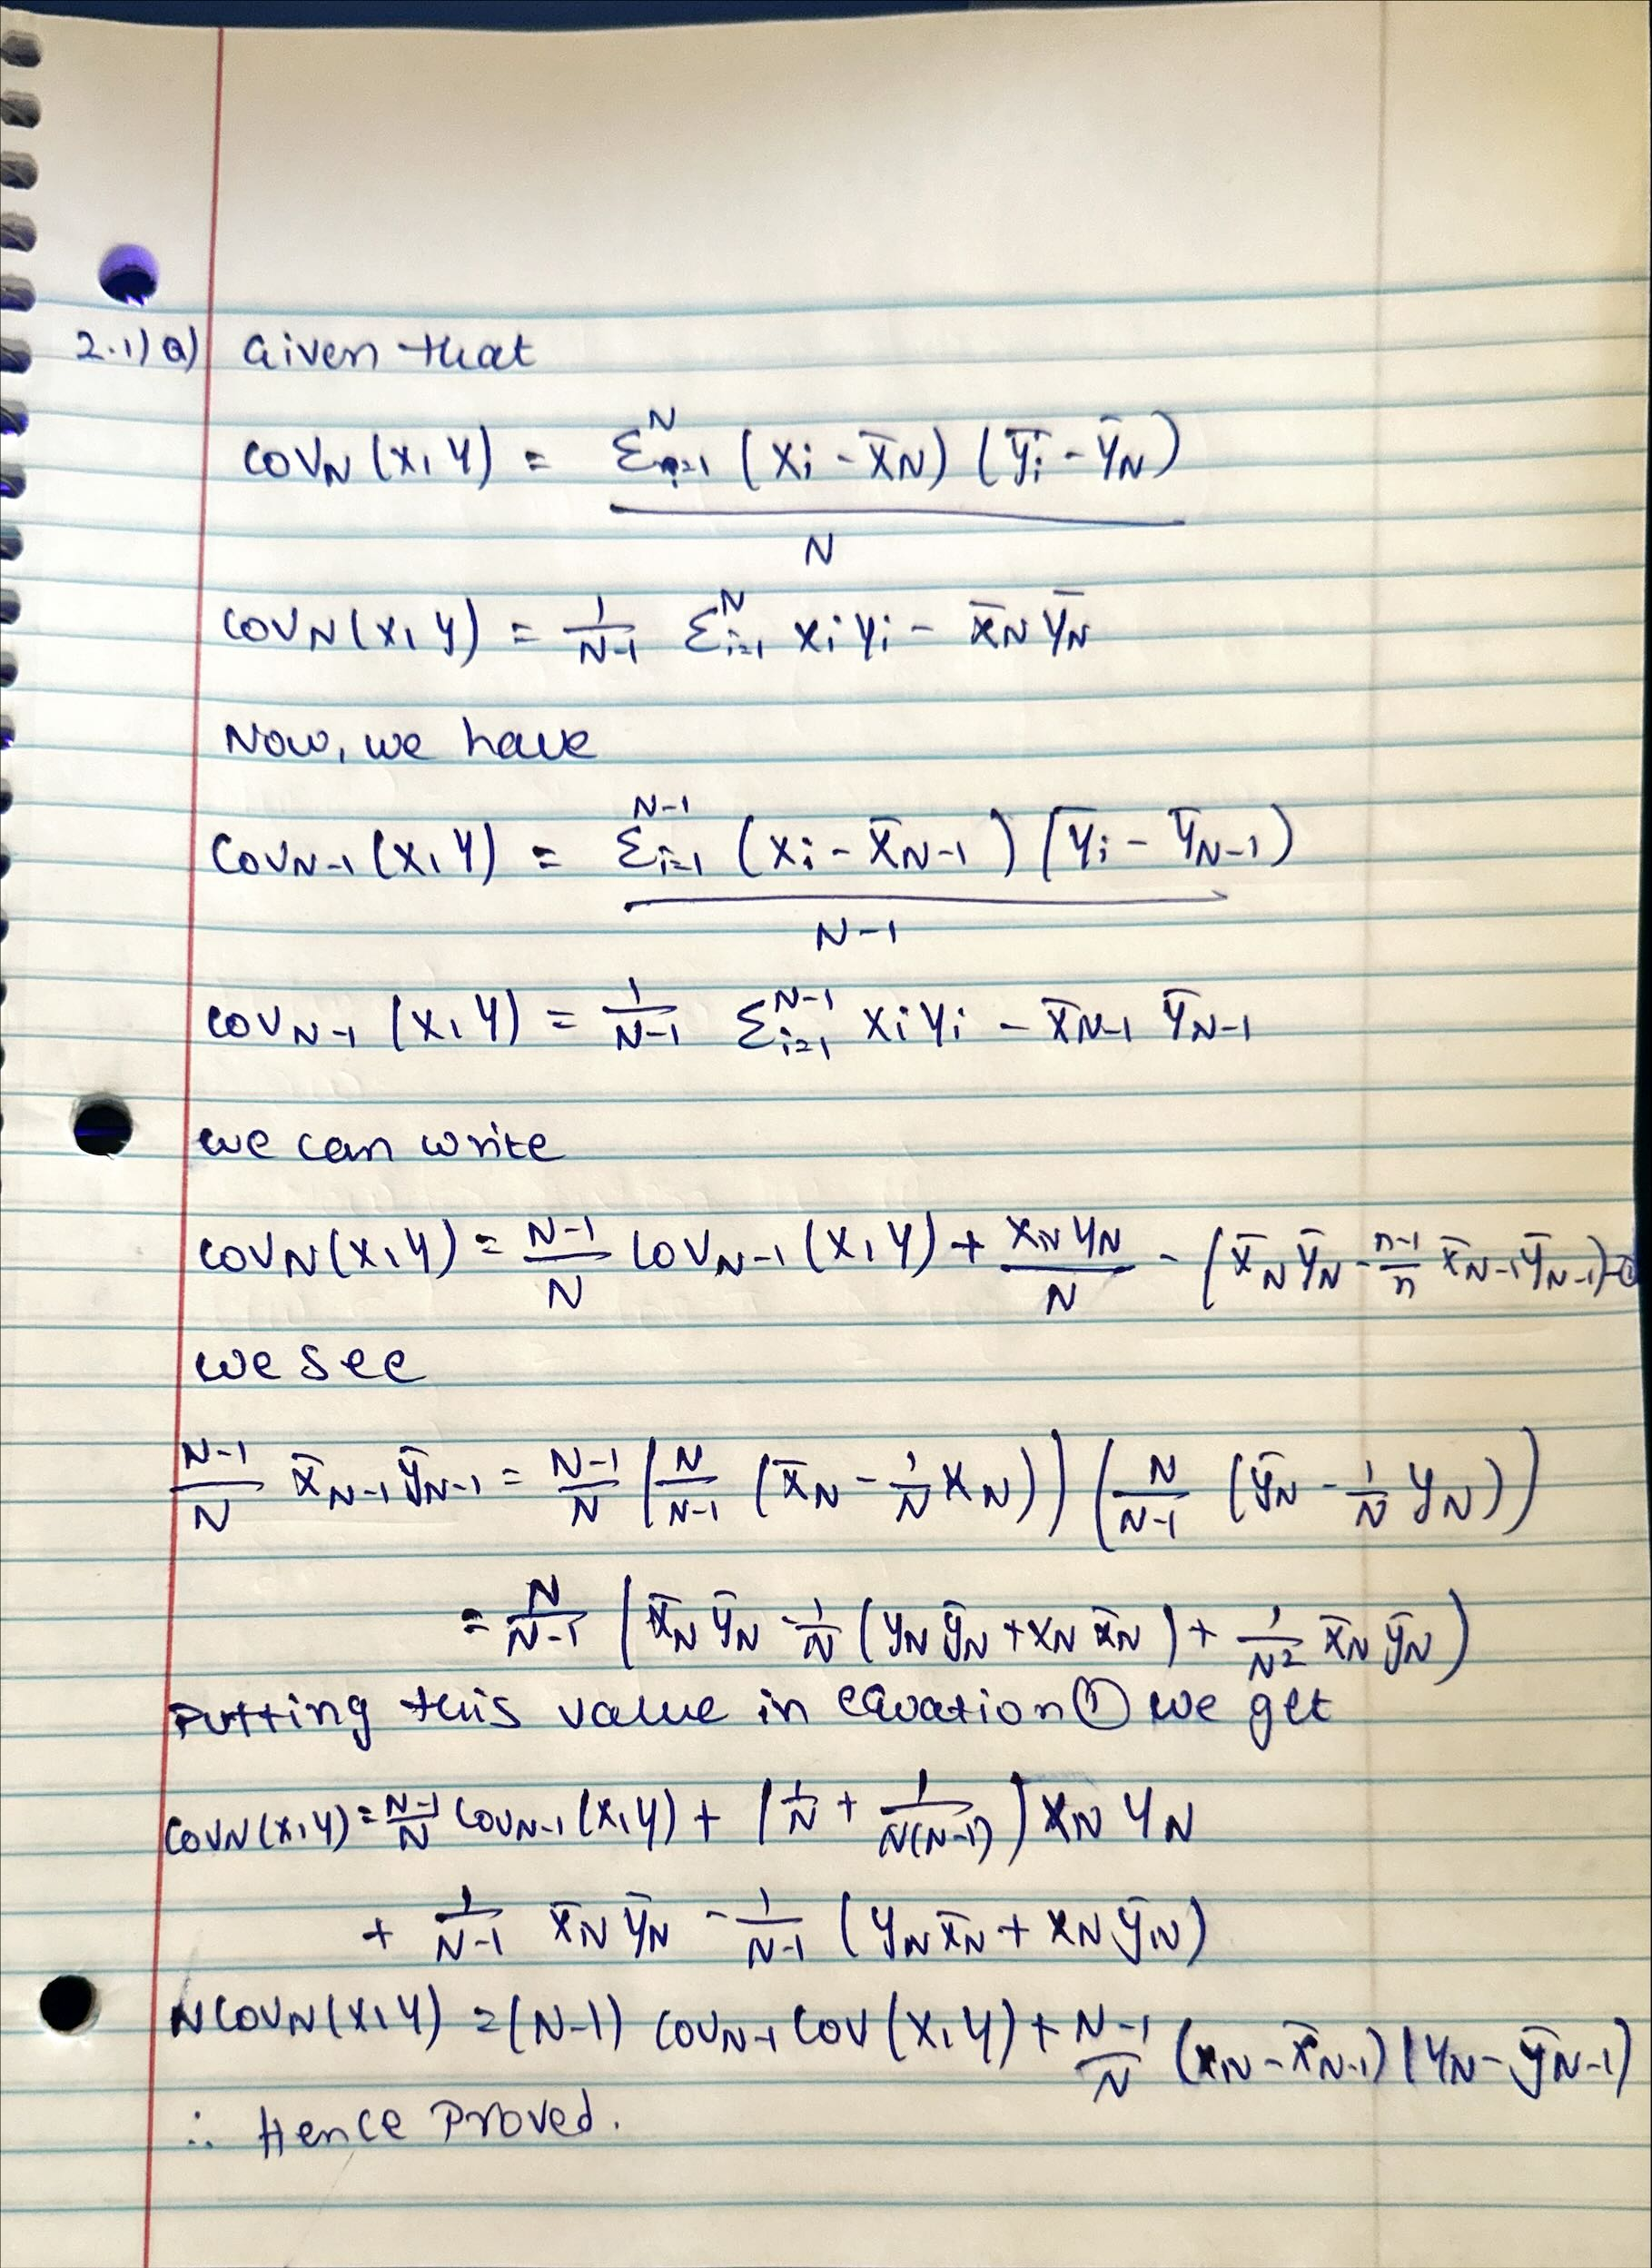



---


### Q2.2: Code (10pt)
Based on Q3.1, please implement a stable one-pass function to calculate the covariance of $X$ and $Y$. Also verify your code with examples of your choice.  


In [ ]:
# Q2.2: Your code starts here



---


### Q2.3: (optional) Multivariate Covariance 
Extend Q3.1 and Q3.2 results to multivariate random varables $\m{X}$ and $\m{Y}$ to calculate covariance matrix!. Also verify it with your examples!

# Your Solution:

In [ ]:
# Q2.3: Your code starts here



---



---


# Q3: Linear Regression (30pt)
### Q3.1: Derivative (5pt)
**Show** the gradient of loss function is  $\nabla\text{RSS}(\mathbf{w})= 2(\mathbf{X}^\top\mathbf{X} \mathbf{w}-\mathbf{X}^\top\mathbf{y}) $  

# Your Solution:
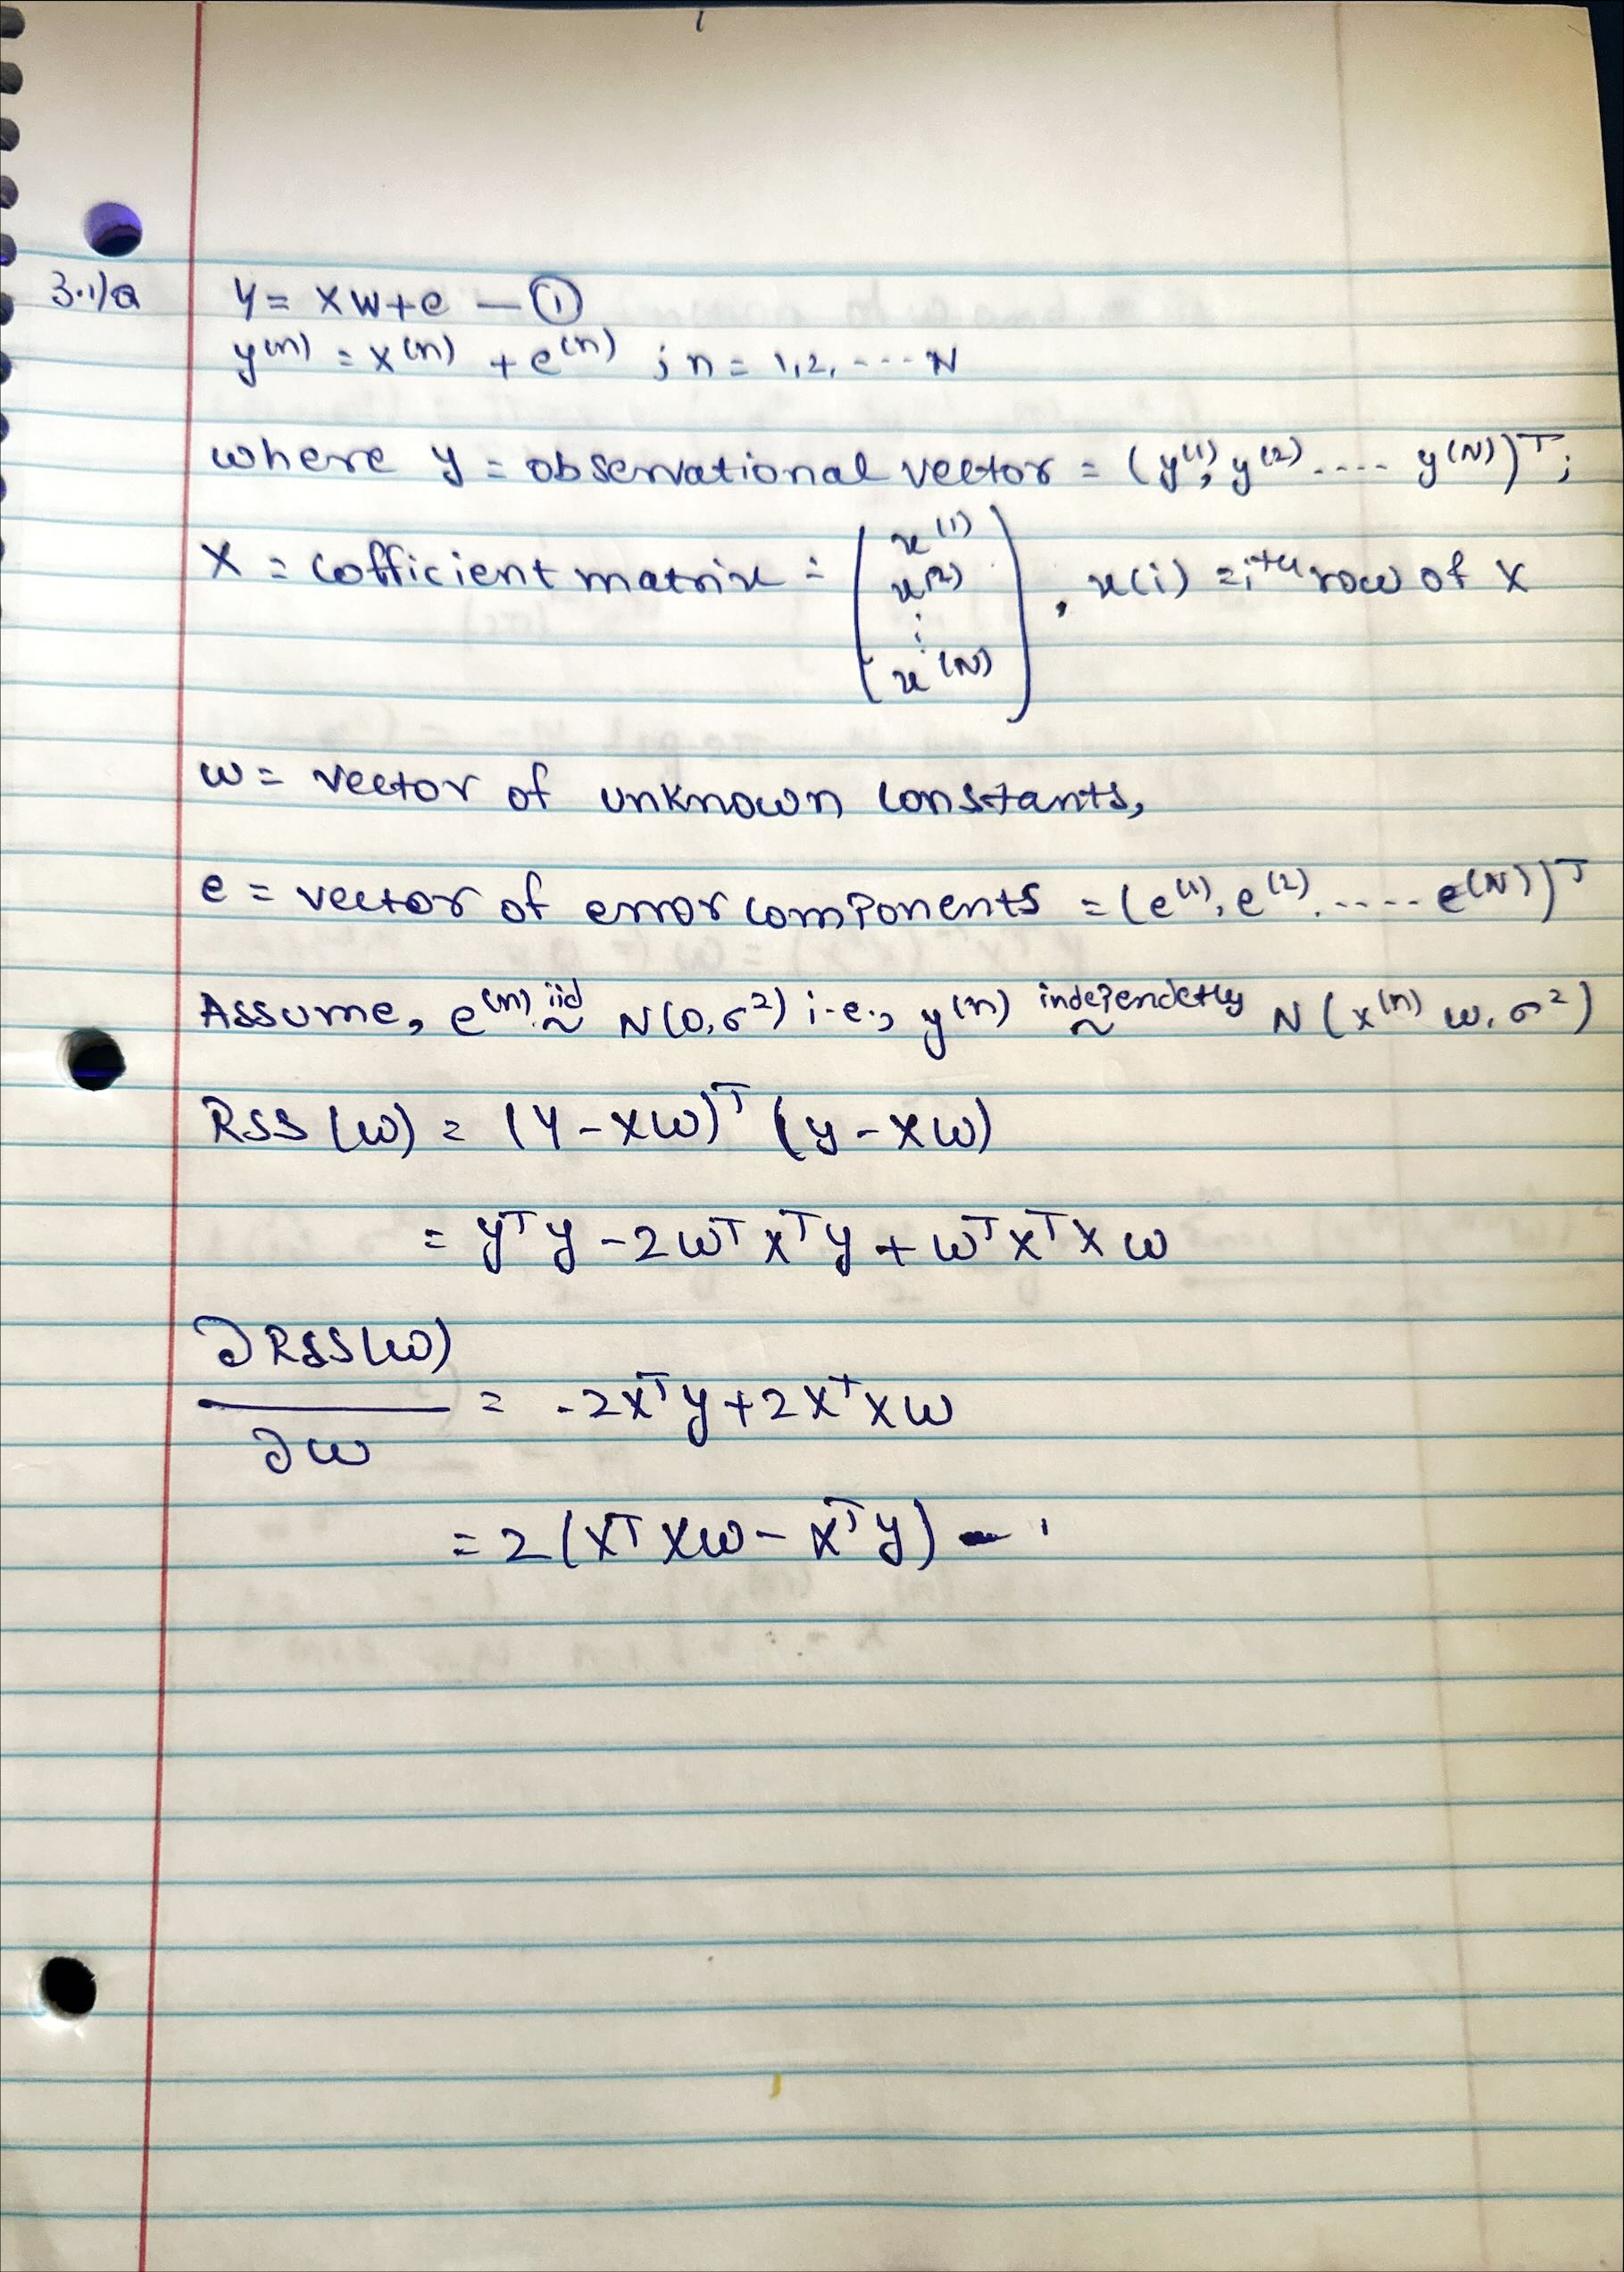



---

### Q3.2: MLE for $\sigma^2$ (5pt)
Show the MLE for the variance of the residue is 
\begin{align}
\hat{\sigma}^2_{\text{MLE}}= \frac{1}{N}\sum_{n=1}^N\left(y^{(n)}- \m{x}^{(n)}\hat{\m{w}}\right)^2
\end{align}



# Your Solution:
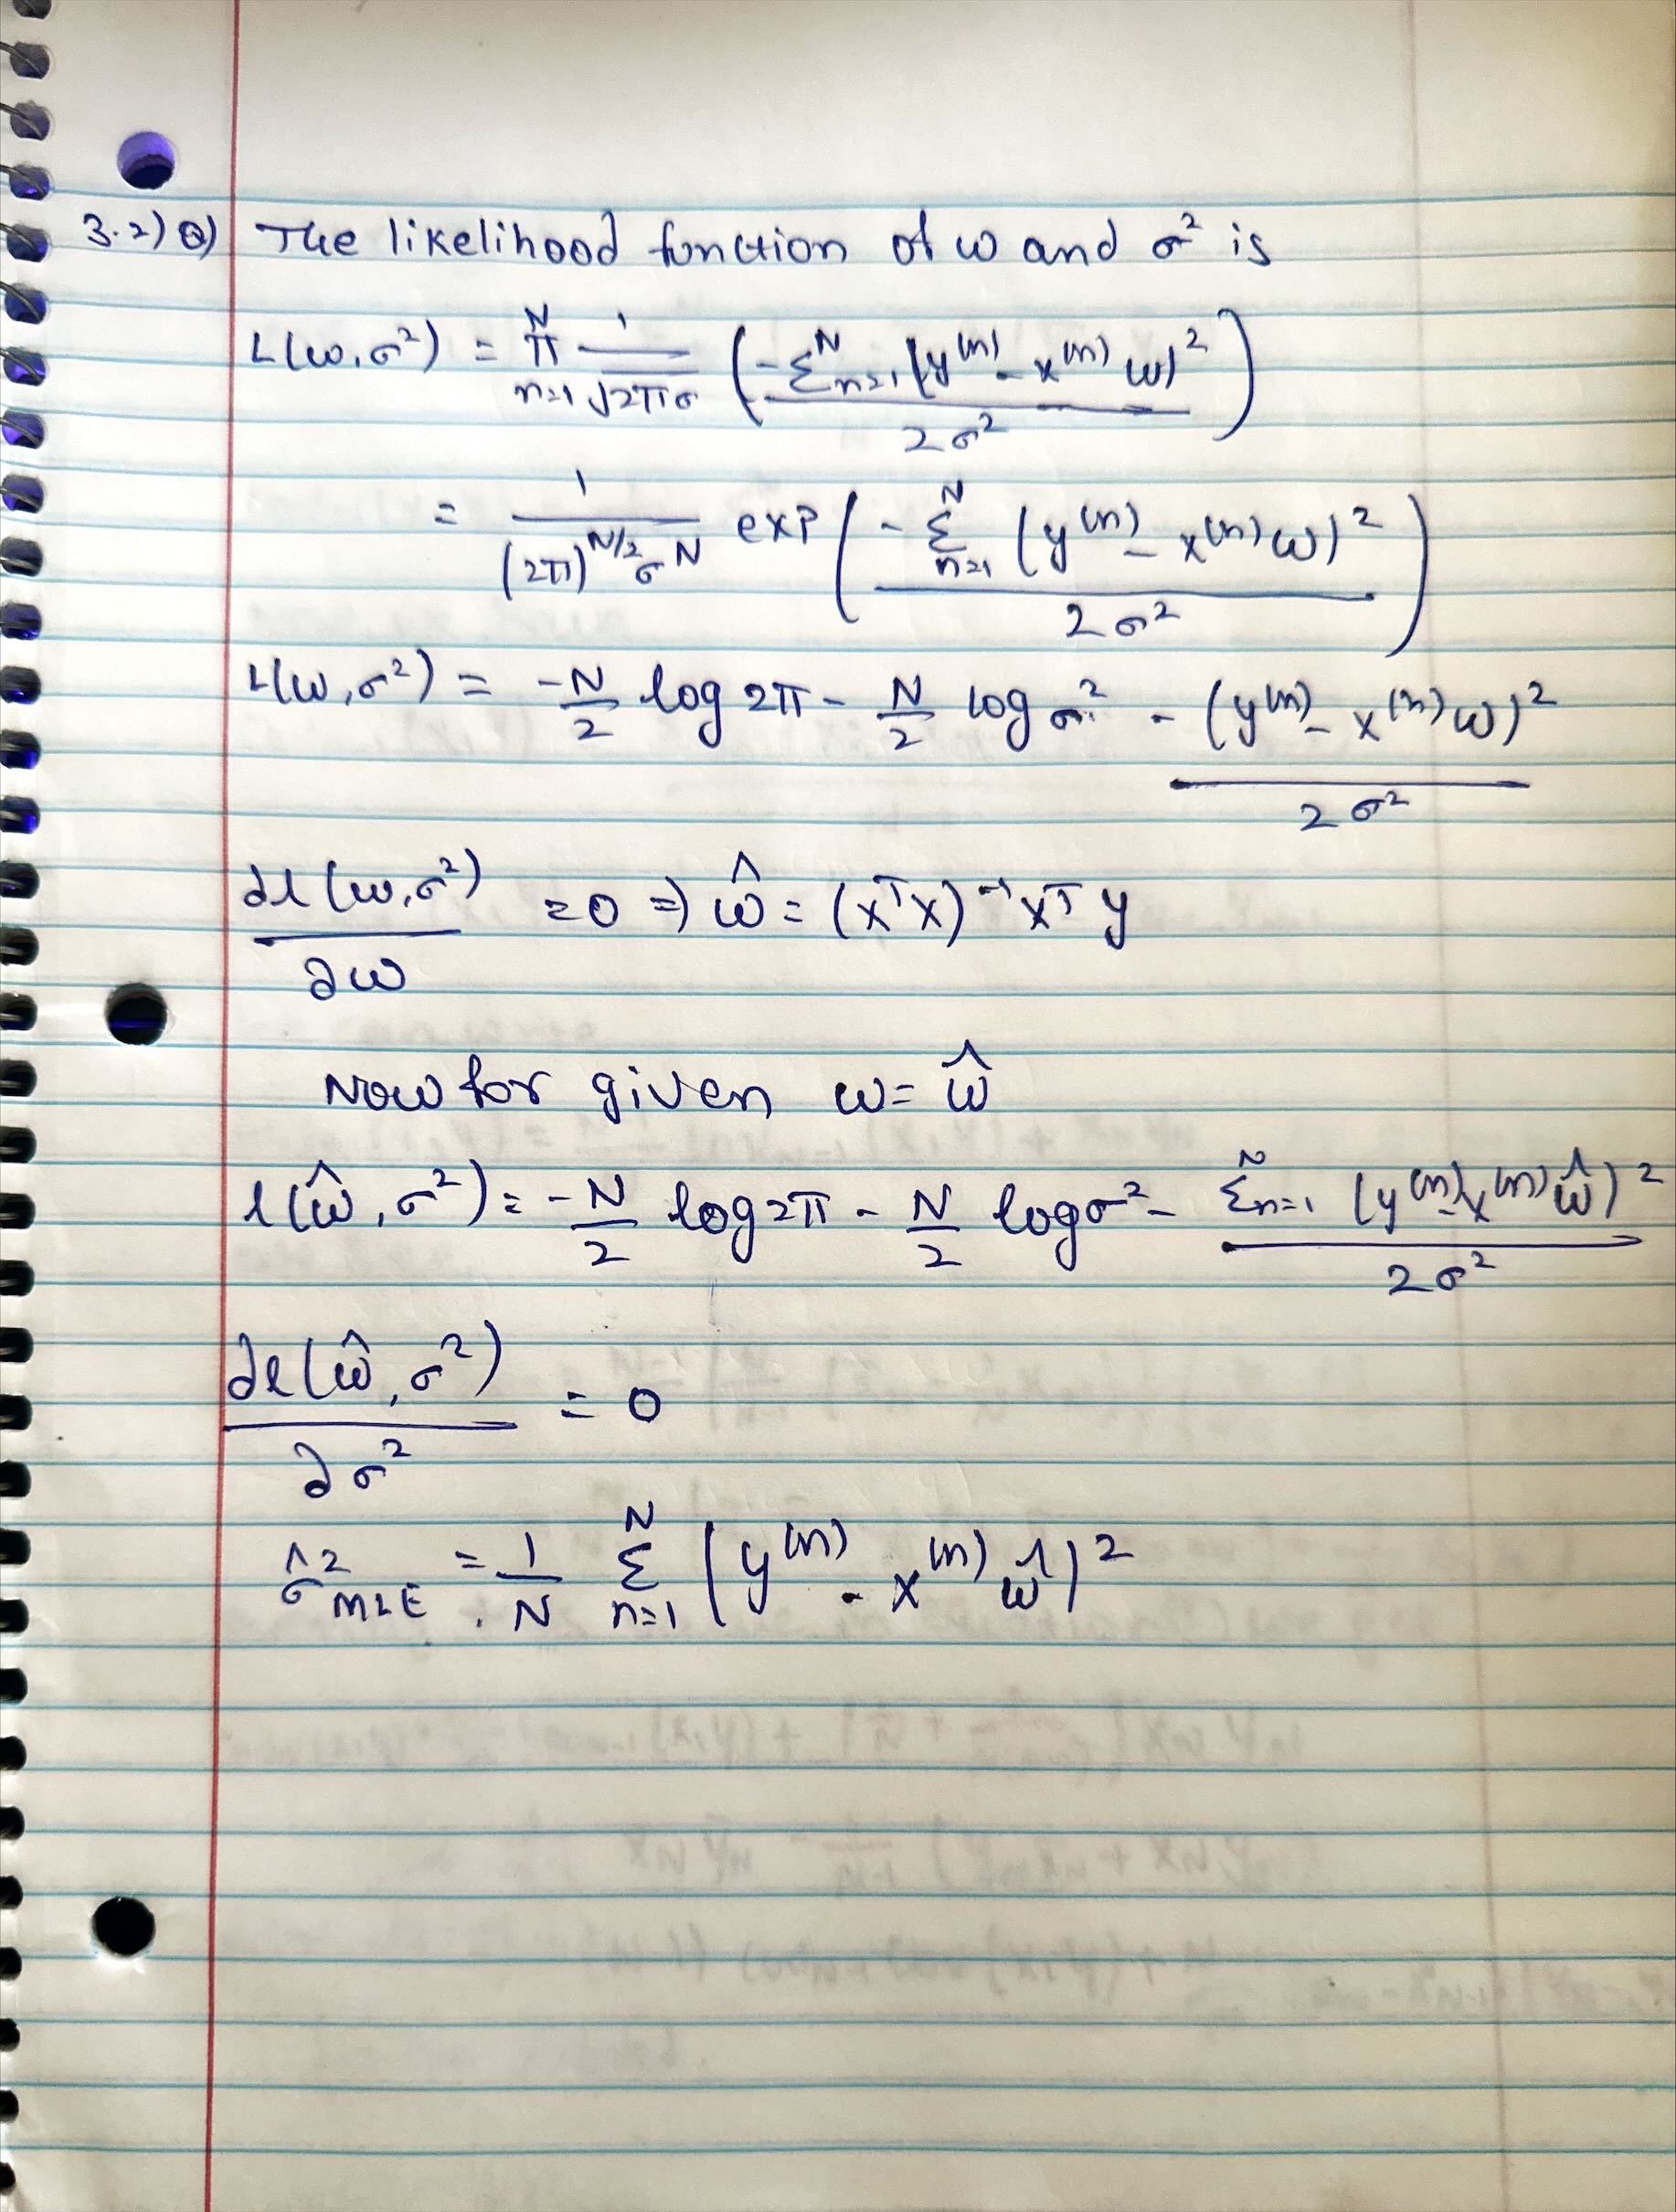





---


### Q3.3 Prostate Cancer (10pt)
**Background**: The data for this example come from a study by Stamey et al. (1989) that examined the correlation between the level of prostate specific antigen (PSA) and a number of clinical measures, in 97 men who were about to receive a radical prostatectomy.
The goal is to predict the log of PSA (lpsa) from a number of measurements.

Variables:

|         |                                                       |
|---------|-------------------------------------------------------|
|lpsa     |log prostate specific antigen                          |
|lcavol   |log cancer volume                                      |
|lweight  |log prostate weight                                    |
|age      |age                                                    |
|lbph     |log of benign prostatic hyperplasia amount             |
|svi      |seminal vesicle invasion                               |
|lcp      |log of capsular penetration                            |
|gleason  |Gleason score                                          |
|pgg45    |percent of Gleason scores 4 or 5                       |


The following code loads the the prostate cancer data set. You can see there are 8 features and 97 cases. We divide the dataset into two parts: the 67 cases as training set (in Xtrain and ytrain) and the 30 cases as test set (in Xtest and ytest). 

In [ ]:
from scipy.io import loadmat

!wget https://github.com/yexf308/MAT592/blob/main/homework/HW1/prostateStnd.mat?raw=true -O prostateStnd.mat
data = loadmat('prostateStnd.mat')
names = list(map(lambda x: x[0], data['names'][0]))
Xtrain, ytrain = data['Xtrain'], data['ytrain']
Xtest, ytest   = data['Xtest'], data['ytest']
print(names)
print(Xtrain.shape)
print(Xtest.shape)


--2022-10-07 01:08:10--  https://github.com/yexf308/MAT592/blob/main/homework/HW1/prostateStnd.mat?raw=true
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/yexf308/MachineLearning/blob/main/homework/HW1/prostateStnd.mat?raw=true [following]
--2022-10-07 01:08:10--  https://github.com/yexf308/MachineLearning/blob/main/homework/HW1/prostateStnd.mat?raw=true
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/yexf308/MachineLearning/raw/main/homework/HW1/prostateStnd.mat [following]
--2022-10-07 01:08:10--  https://github.com/yexf308/MachineLearning/raw/main/homework/HW1/prostateStnd.mat
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/yexf308/MachineLearning/main/h

The **Coefficient of Determination** is defined as follows,
$$ R^2= 1- \frac{\sum_{n=1}^N(\hat{y}^{(n)}-y^{(n)})^2}{\sum_{n=1}^N(\bar{y}-y^{(n)})^2}$$
where $\bar y = \frac{1}{N}\sum_{n=1}^N y^{(n)}$. 

- Please write a function to calculate coefficient of determination. 

- Please perform the linear regression with least squares and caclulate coefficient of determination. 

- Use this model to calculate the MSE(mean squared error) on the test set. Do you think we have the overfitting issue?

In [ ]:
import math

def r2_score(ytrue, ypred):

  mean = np.mean(ytrue);

  numerator = 0
  for i in range(len(ytrue)):
    numerator += (ytrue[i] - ypred[i])**2
  print(numerator)
  denominator = 0
  for i in range(len(ytrue)):
    denominator += (mean - ytrue[i])**2
  print(denominator)
  k = 1 - numerator/denominator
  print(k)
  return k
  # Your code starts here



---


### Q3.4 Ridge Regression (10pt)
We will use the prostate cancer dataset again.
- Please perform the Ridge regression with the hold out. Use the MSE on the test data to find the optimal penalty parameter $\lambda^*$. 

- Calculate coefficient of determination. Compare with the least square, do you have any improvement? 

- Plot *regularization path*, the coefficients $w_i$ as a function of the parameter $1/\lambda$.



In [ ]:
q, r = np.linalg.qr(Xtest)
p = np.dot(q.T, ytest)
B=np.dot(np.linalg.inv(r), p)
print(B)

yHat = Xtest.dot(B)
y_residue1 = ytest - yHat

def RSS(y_residue):
  return 1/2 * np.sum(y_residue**2)

print(RSS(y_residue1))  

print(r2_score(ytest,y_residue1))

[[ 0.86975103]
 [ 0.43200124]
 [-0.98260032]
 [ 0.63847556]
 [ 0.26240375]
 [ 0.26927144]
 [ 0.85356294]
 [-1.30040982]]
74.59697629343452
[75.31744871]
[31.48929856]
[-1.39184269]
[-1.39184269]


In [ ]:
P,q=Xtest. shape
X2 = np.ones((P,1))
k=np.column_stack((X2, Xtest))
q, r = np.linalg.qr(k)
S= np.linalg.solve(r,q.T.dot(ytest))
L=np.dot(np.linalg.inv(r), S)
yHat= k.dot(S)
res1 = ytest- yHat
def RSS (res) :
 return 1/2 * np.sum(np.power(res1,2))
 
print (RSS (res1))
print (r2_score(ytest, yHat))

4.7757398737179075
[9.55147975]
[31.48929856]
[0.69667537]
[0.69667537]




---


### Q3.5 (optional)
**Show** in linear regression, the coefficient of determination $0\le R^2\le 1$.

# Your Solution:



---

---

# Q4: Ridge Regression on MNIST dataset (40pt)
We will implement the Ridge Regression for the MNIST data set. The task
is to classify handwritten images of numbers between 0 to 9.

Each example has features $\m{x}^{(i)}\in \mb{R}^d$ where $d=28\times 28=784$ and label $y^{(i)}\in \{0,\dots, 9\}$. Here we will ignore the intercept. We wish to learn a predictor $\hat f$ that takes as input a vector in $\mb{R}^d$ and output an index in $\{0, \dots, 9\}$. We define our training and testing classification error on a predictor $f$ as 
\begin{align}
\ell_{\text{train}}(f) = \frac{1}{|\c{D}_{\text{train}}|}\sum_{(\m{x}^{(i)}, y^{(i)})\in\c{D}_{\text{train}}} \mb{1}_{f(\m{x}^{(i)})\ne y^{(i)}} \\
\ell_{\text{test}}(f) = \frac{1}{|\c{D}_{\text{test}}|}\sum_{(\m{x}^{(i)}, y^{(i)})\in\c{D}_{\text{test}}} \mb{1}_{f(\m{x}^{(i)})\ne y^{(i)}} 
\end{align}


In [ ]:
from keras.datasets import mnist
(train_X, train_y), (test_X, test_y) = mnist.load_data()
Xtr                   = train_X[0:8000, :]
train_y_part          = train_y[0:8000]
Ytr                   = zeros(train_y_part.size)
Ytr[train_y_part==9]=1

Xte                   = test_X[0:2000,:]
test_y_part           = test_y[0:2000]
Yte  = zeros(test_y_part.size)
Yte[test_y_part==9]=1

print('Xtr: ' + str(Xtr.shape))
print('Ytr: ' + str(Ytr.shape))
print('Xte: '  + str(Xte.shape))
print('Yte: '  + str(Yte.shape))

Xtr: (8000, 28, 28)
Ytr: (8000,)
Xte: (2000, 28, 28)
Yte: (2000,)


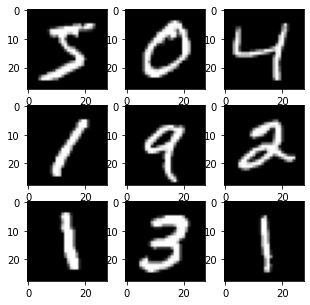

In [ ]:
fig, axs = plt.subplots(3, 3,figsize=(5,5))
axs = axs.ravel()

for i in range(9):
    axs[i].imshow(Xtr[i], cmap=pyplot.get_cmap('gray'))



---


### Q4.1 Prepare data (5pt)
- Prepare your training matrix $\m{X}$.

- We will use one-hot encoding of the labels, that is the original label $y\in\{0, \dots, 9\}$ is mapped to the standard basis vector $e_y$ where $e_y$ is a vector of all zeros except for a 1 in the $z$th position. Then label one-hot encoded in $\m{y}\in \mb{R}^{1\times k}$, $k=10$. We can stack all $\m{y}^{(i)}$ to be a matrix $\m{Y}\in \mb{R}^{N\times k}$. Prepare your matrix $\m{Y}$.

- Don't forget to do the same preparation for the testing data.





In [ ]:
import numpy as np

Xtr =  hstack([ones((train_X.shape[0],1)), train_X.reshape(60000, 28*28)])
#Rechaning the shape of the matrix to (60000,785)

train_y_part          = train_y
Ytr                   = zeros(train_y_part.size)
Ytr[train_y_part==9]=1 # Making all the 9 numbers as '1' in the data set.

# Chaning the data set from (2000,28,28) to (10000,28,28)
Xte                   = test_X 
test_y_part           = test_y
Yte  = zeros(test_y_part.size)
# Chaning the data set from (2000,) to (10000,)
Yte[test_y_part==9]=1

print('Xtr: ' + str(Xtr.shape))
print('Ytr: ' + str(Ytr.shape))
print('Xte: '  + str(Xte.shape))
print('Yte: '  + str(Yte.shape))
#The code below is to count the number of '9' digits persent in 60000 traning set.
count = 0
for i in Ytr:
   count+=i
print(count)

Xtr: (60000, 785)
Ytr: (60000,)
Xte: (10000, 28, 28)
Yte: (10000,)
5949.0




---


### Q4.2 Ridge regression (10pt)
We will choose a linear classifier to minimize the following objective
\begin{align}
\hat{\m{W}}=\arg\min_{\m{W}\in \mb{R}^{d\times k}}\|\m{X}\m{W}-\m{Y}\|_2^2 +\lambda \|\m{W}\|_F^2
\end{align}
where $\|\m{W}\|_F$ is the Frobenius norm of $\m{W}$, $\|\m{W}\|_F^2 = \sum_{i=1}^d\sum_{j=1}^k \m{W}_{ij}^2$. To predict a data point $\m{x}^{(i)}$, the predicted $\hat{\m{y}}^{(i)}= \m{x}^{(i)}\hat{\m{W}}$ and the predicted digit is the correspoding index has the largest value, 
\begin{align}
\text{digit} = \arg\max_{j=0,\dots, 9} \hat{\m{y}}^{(i)}_j
\end{align}

**Show** it has analytical solution, 
\begin{align}
\hat{\m{W}}= (\m{X}^\top \m{X}+\lambda \m{I})^{-1}\m{X}^\top\m{Y} 
\end{align}
Hint: If we just take $i$-th column of $\m{Y}$, it will recover the ridge regression discussed in the lecture. 




# Your solution:
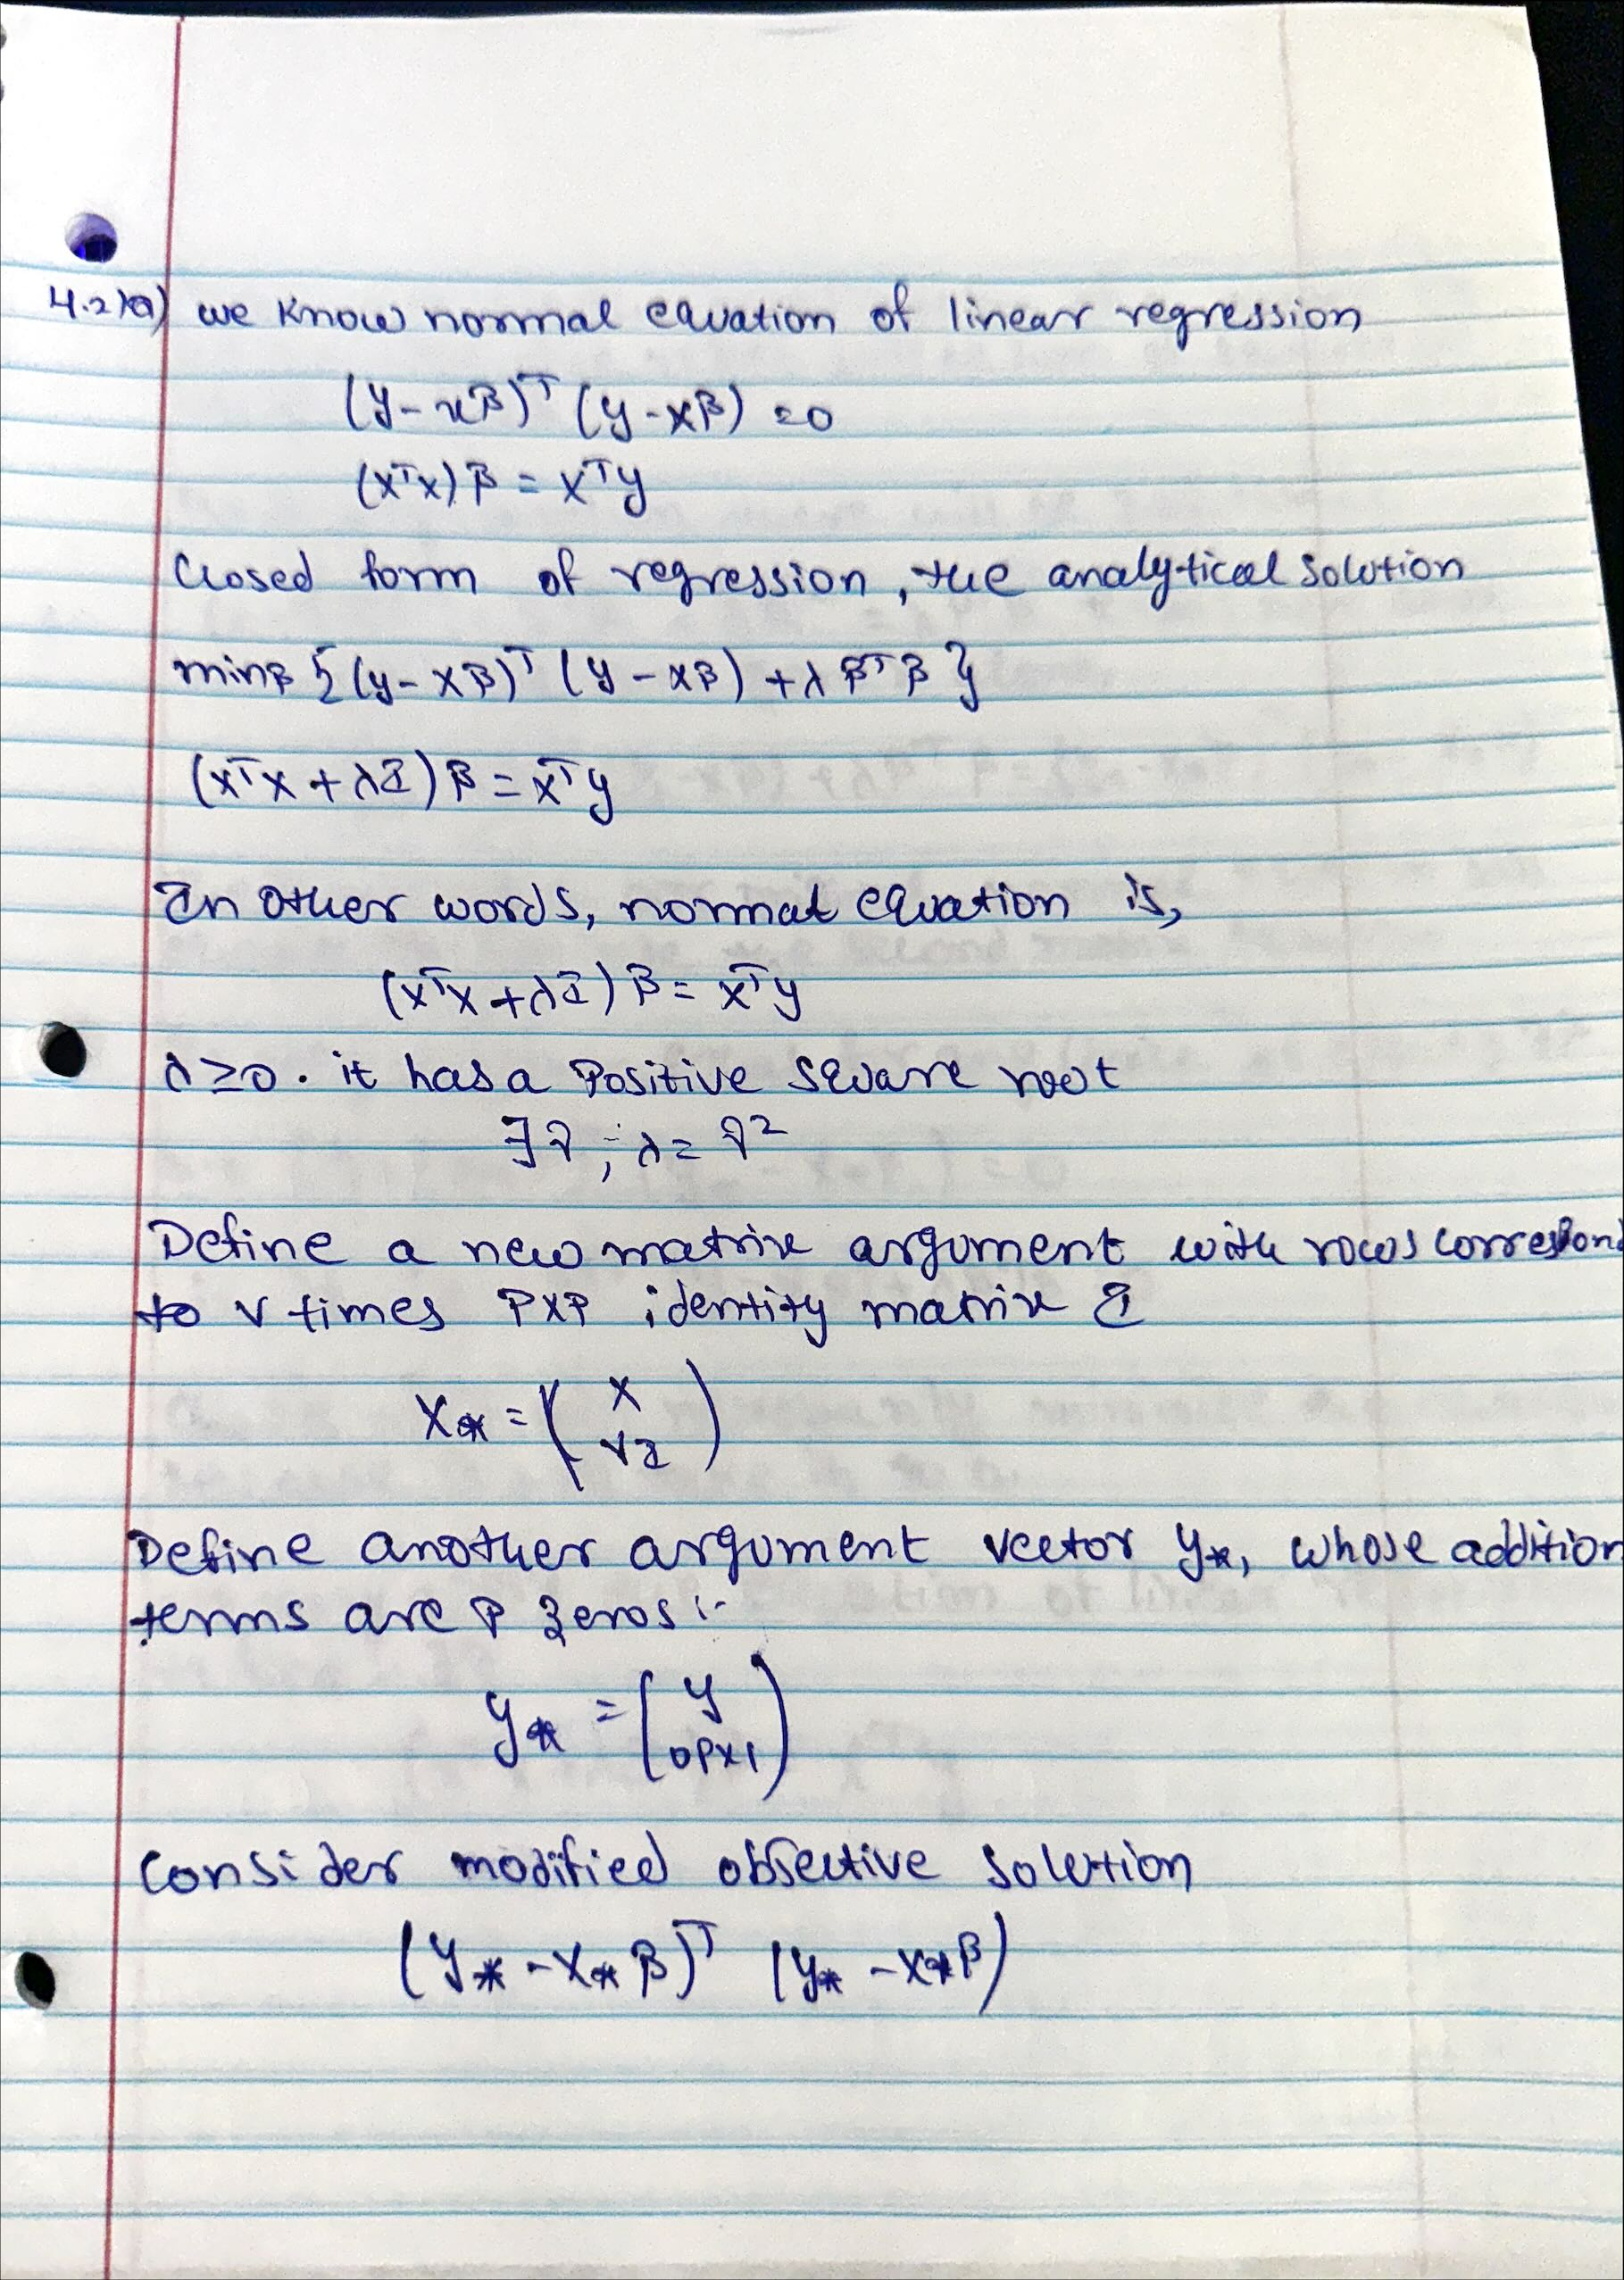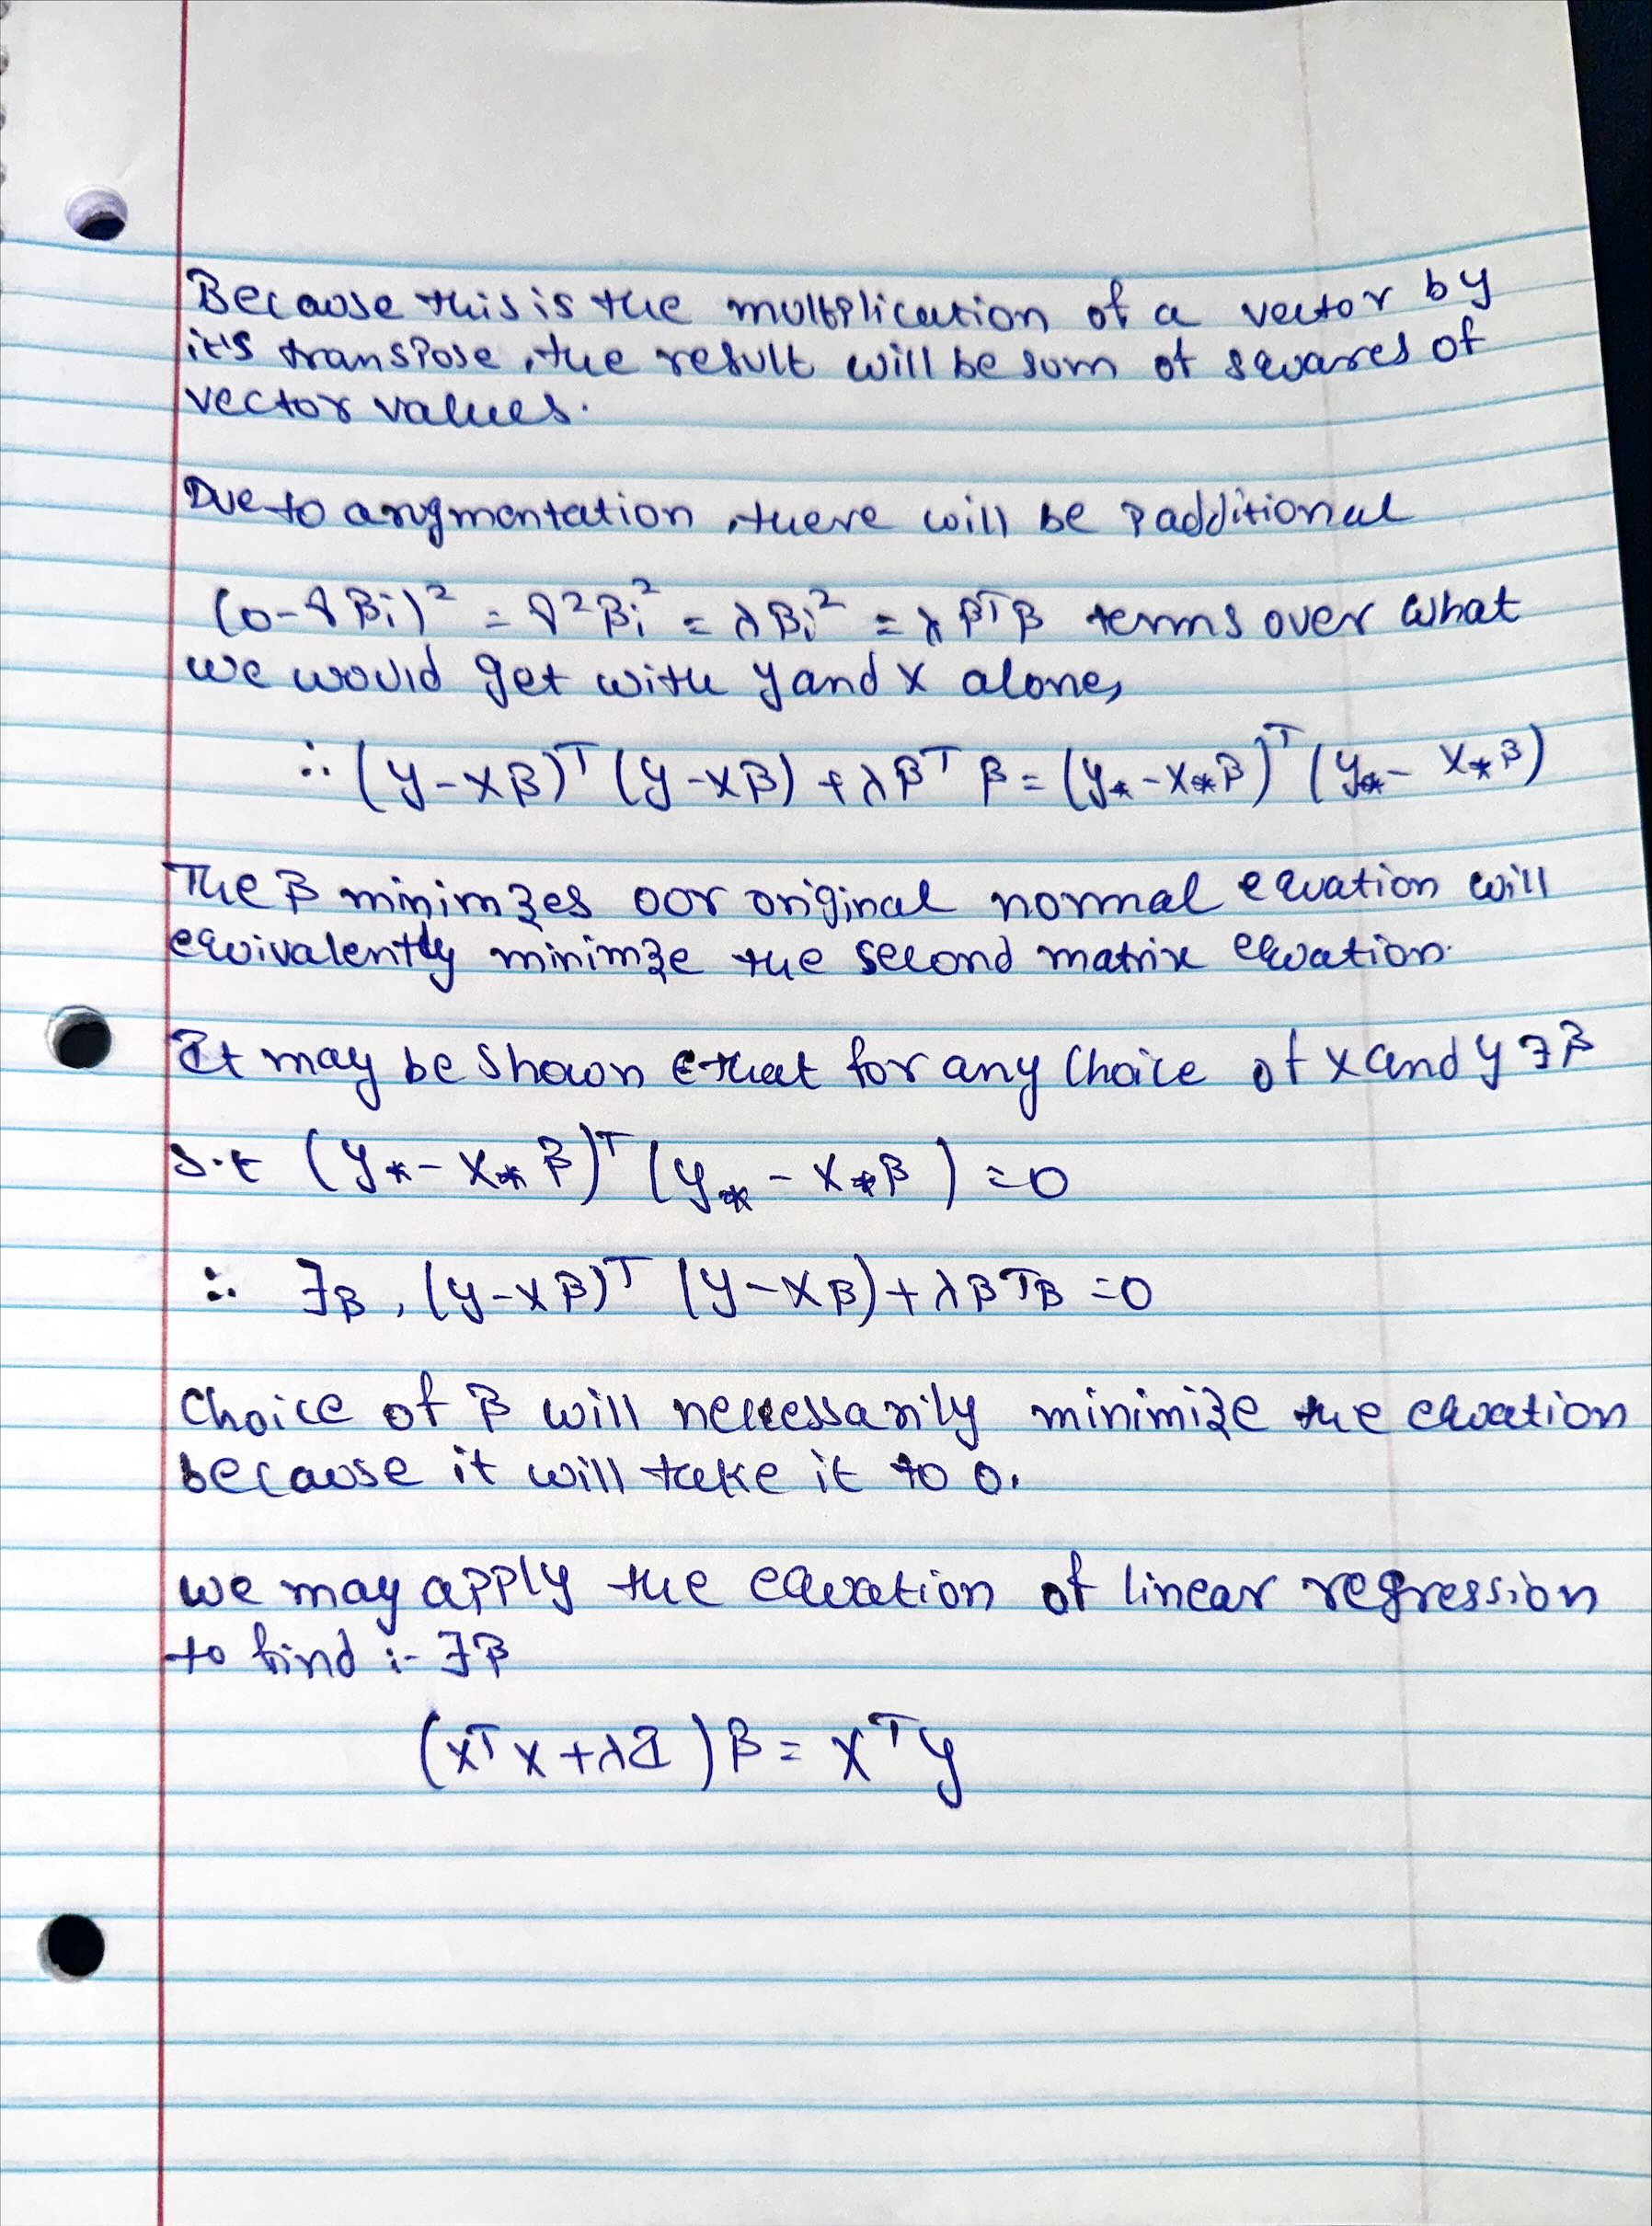



---


### Q4.3 Implementation (10pt)
- Code a function `train` that takes as input $\m{X}\in\mb{R}^{N\times d}, \m{Y}\in \mb{R}^{N\times k}, \lambda>0$ and returns $\hat{\m{W}}\in \mb{R}^{d\times k}$. 

- Code a function `predict` that takes as input $\m{W}\in \mb{R}^{d\times k}$, $\tilde{\m{X}}\in\mb{R}^{M\times d} $ and returns an $M$-length vector with the $i$th entry equal to $\arg\max_{j=0,\dots, 9} \tilde{\m{y}}^{(i)}_j$, where  $\tilde{\m{y}}^{(i)}$ is the predicted value from the data point $\tilde{\m{x}}^{(i)}$, which is $i$th row of $\tilde{\m{X}}$. 

- Train $\hat{\m{W}}$ on MNIST training data with $\lambda=10^{-4}$ and make label predictions on the test data. What is the training and testing error? As a remark, it should be around 15\%. 

In [ ]:
# your code starts here
def train(X, y, lambda): 
    """Train function for the Ridge Regression problem.
    Should use observations (`X`), targets (`y`) and regularization parameter (`lambda`)
    to train a weight matrix $$\\hat{W}$$.


    Args:
        X (np.ndarray): observations represented as `(n, d)` matrix.
            n is number of observations, d is number of features.
        y (np.ndarray): targets represented as `(n, k)` matrix.
            n is number of observations, k is number of classes.
        lambda (float): parameter for ridge regularization.

    Raises:
        NotImplementedError: When problem is not attempted.

    Returns:
        np.ndarray: weight matrix of shape `(d, k)`
            which minimizes Regularized Squared Error on `x` and `y` with hyperparameter `_lambda`.
    """
    raise NotImplementedError("Your Code Goes Here")

SyntaxError: ignored

In [ ]:
def predict(X, w):
    """Train function for the Ridge Regression problem.
    Should use observations (`X`), and weight matrix (`w`) to generate predicated class for each observation in X.

    Args:
        X (np.ndarray): observations represented as `(n, d)` matrix.
            n is number of observations, d is number of features.
        w (np.ndarray): weights represented as `(d, k)` matrix.
            d is number of features, k is number of classes.

    Raises:
        NotImplementedError: When problem is not attempted.

    Returns:
        np.ndarray: predictions matrix of shape `(n,)` or `(n, 1)`.
    """
    raise NotImplementedError("Your Code Goes Here")

In [ ]:
def one_hot(y, num_classes):
    """One hot encode a vector `y`.
    One hot encoding takes an array of integers and coverts them into binary format.
    Each number i is converted into a vector of zeros (of size num_classes), with exception of i^th element which is 1.

    Args:
        y (np.ndarray): An array of integers [0, num_classes), of shape (n,)
        num_classes (int): Number of classes in y.

    Returns:
        np.ndarray: Array of shape (n, num_classes).
        One-hot representation of y (see below for example).

    Example:
        ```python
        > one_hot([2, 3, 1, 0], 4)
        [
            [0, 0, 1, 0],
            [0, 0, 0, 1],
            [0, 1, 0, 0],
            [1, 0, 0, 0],
        ]
        ```
    """
    raise NotImplementedError("Your Code Goes Here")


In [ ]:
# your main function goes here.



---


### Q4.4 Improvement (15pt)
We just fit a classifier that was linear in the pixel intensities to the MNIST data. For
classification of digits the raw pixel values are very, very bad features: it’s pretty hard to separate
digits with linear functions in pixel space. The standard solution to this is to come up with some
transform $h: \mb{R}^d \rightarrow \mb{R}^p$ p of the original pixel values such that the transformed points are (more easily)
linearly separable. This idea is very similar as SVM. In this problem, you’ll use the feature transform: 
\begin{align}
h(\m{x}) = \cos(\m{G}\m{x}+\m{b})
\end{align}
where $\m{G}\in \mb{R}^{p\times d}$ and $\m{b}\in \mb{R}^p$ and the cosine function is applied elementwise. We will choose $\m{G}$ to be a random matrix, with each entry sampled i.i.d. from a Gaussian distribution with mean $\mu=0$ and $\sigma^2=0.1$. And $\m{b}$ is a random vector sampled i.i.d. from the uniform distribution on $[0,2\pi]$. 

The
big question is: how do we choose the dimension $p$? **cross-validation!!**

- Randomly partition your training set into proportions 80/20 to use as a new training set and validation
set, respectively. 

-  Using the `train` function you wrote above, train a $\hat{\m{W}}^p$ for different values of $p$.

- plot the  training error and validation error on a single plot with $p$ on the $x$-axis. 

Be
careful, your computer may run out of memory and slow to a crawl if $p$ is too large. As a remark, $p\le 6000$ should fit to colab. If you have trouble, you can start with $p=1000$. 

You can use the same value of $\lambda$, which is $\lambda=10^{-4}$. But feel free to study the
effect of using different values of $\lambda$ and $\sigma^2$. 

Do you improve your training/testing error? 

In [ ]:
from sklearn.utils import shuffle
n = Xtr.shape[0]

X,Y = shuffle(Xtr,Ytr)
Xtr = X[:int(0.8*n)]
Ytr = Y[:int(0.8*n)]
Xte = X[int(0.8*n):]
Ytr = Y[int(0.8*n):]

p_list = np.arange(200, 4000, 200)
train_err = []
test_err = []

for p in p_list:
  G = np.random.normal(0,0.1,(p,Xtr.shape[1]))
  b = np.random.uniform(0, 2*np.pi, (p,))
  X_train_transform = np.cos(Xtr.dot(G.T) + b)
  w_hat = Xtr(X_train_transform,np.eye(10),[Ytr], 0.0001)
  X_test_transform = np.cos(Xte.dot(G.T) + b)
  Y_train_preds = predict(w_hat, X_train_transform)
  Y_test_preds = predict(w_hat, X_test_transform)

  print("p=", p)
  train_acc = np.count_nonzero(Ytr == Y_train_preds)/ Ytr.shape[0]
  train_err.append(1-train_acc)
  print("Training Error:", 1-train_acc )
  test_acc = np.count_nonzero(Yte == Y_test_preds)/ Yte.shape[0]
  test_err.append(1-test_acc)
  print("Test Error:", 1-test_acc)

TypeError: ignored

# Your solution:



---


### Q4.5 Confidence Interval (optional)
Instead of reporting just the test error, which is an unbiased estimate of the true error, we
would like to report a confidence interval around the test error that contains the true error.

**Lemma**: (Hoeffding’s inequality) Fix $\delta\in(0,1)$, if for all $i=1,\dots, m$ we have that $X_i$ are i.i.d. random variables with $X_i\in [a,b]$ and $\mathbb{E}[X_i]=\mu$ then 
\begin{align}
\mathbb{P}\left(\left|\left(\frac{1}{m}\sum_{i=1}^m X_i\right)-\mu\right|\ge \sqrt{\frac{(b-a)^2\log(2/\delta)}{2m}}\right)\le \delta 
\end{align}

We will use the above equation to construct a confidence interval around the true classification error $\mathcal{E}(\hat f)= \mb{E}_{\text{test}}[\hat{\c{E}}_{\text{test}}(\hat f)]$ since the test error $\hat{\c{E}}_{\text{test}}(\hat f)$ is just the average of indicator variables taking values in $\{0,1\}$ corresponding to the $i$-th test example being classified correctly or not, respectively, where an error happens with probability $\mathcal{E}(\hat f)= \mb{E}_{\text{test}}[\hat{\c{E}}_{\text{test}}(\hat f)]$ the true classification error. 

Let $\hat p$ be the value of $p$ that approximately minimizes the validation error on the plot you just made
and use $\hat f(x) = \arg\max_j x^\top \hat{\m{W}}^{\hat p}e_j$ to compute the classification test error $\hat{\c{E}}_{\text{test}}(\hat f)$. Use Hoeffding’s
inequality, to compute a confidence interval of $\hat{\c{E}}_{\text{test}}(\hat f)$ that contains the true classification error $\mb{E}_{\text{test}}[\hat{\c{E}}_{\text{test}}(\hat f)]$ with probability at least 0.95 (i.e., $\delta=0.05$).   

# Your solution: